In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline                            
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
# 그래프 해상도 업그레이드
%config InlineBackend.figure_format = 'retina'

In [2]:
#코드 연산 속도 측정
from tqdm.auto import tqdm
# 경고문 무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
x_train = pd.read_csv('jeju_train.csv')
x_test = pd.read_csv('jeju_test.csv')

In [4]:
x_train.head()
x_test.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
3,TEST_000003,20220818,목,23,3,103,일반국도11호선,0,0,70.0,...,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
4,TEST_000004,20220810,수,17,3,106,번영로,0,0,70.0,...,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음


In [5]:
print(x_train.shape)
print(x_test.shape)

(4701217, 23)
(291241, 22)


In [6]:
print(x_train.info())
print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [7]:
## 결측치 존재 여부 확인 -> 없음
print(x_train.isnull().sum())
print(x_test.isnull().sum())

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64
id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type      

In [8]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
base_date,4701217.0,2.021672e+07,4555.708569,2.021090e+07,2.021110e+07,2.022013e+07,2.022050e+07,2.022073e+07
base_hour,4701217.0,1.192820e+01,6.722092,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
lane_count,4701217.0,1.836651e+00,0.687751,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
road_rating,4701217.0,1.049585e+02,1.840107,1.030000e+02,1.030000e+02,1.060000e+02,1.070000e+02,1.070000e+02
multi_linked,4701217.0,4.762597e-04,0.021818,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
connect_code,4701217.0,2.660218e-01,5.227760,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.030000e+02
maximum_speed_limit,4701217.0,6.125329e+01,12.133539,3.000000e+01,5.000000e+01,6.000000e+01,7.000000e+01,8.000000e+01
vehicle_restricted,4701217.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
weight_restricted,4701217.0,5.618742e+03,13953.433234,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+04
height_restricted,4701217.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [9]:
x_train.describe(include='object')

,id,day_of_week,road_name,start_node_name,start_turn_restricted,end_node_name,end_turn_restricted
count,4701217,4701217,4701217,4701217,4701217,4701217,4701217
unique,4701217,7,61,487,2,487,2
top,TRAIN_0000000,금,일반국도12호선,고성교차로,없음,고성교차로,없음
freq,1,684024,1046092,42169,4239701,42265,4239599


In [10]:
## 데이터 타입 변경
to_int32 = ["base_date", "base_hour", "lane_count", "road_rating", "multi_linked", "connect_code", "road_type"]
to_float32 = ["vehicle_restricted", "height_restricted", "maximum_speed_limit", "weight_restricted", "target"]

for i in to_int32:
    x_train[i] = x_train[i].astype("int32")
for j in to_float32:
    x_train[j] = x_train[j].astype("float32")

print(x_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int32  
 2   day_of_week            object 
 3   base_hour              int32  
 4   lane_count             int32  
 5   road_rating            int32  
 6   road_name              object 
 7   multi_linked           int32  
 8   connect_code           int32  
 9   maximum_speed_limit    float32
 10  vehicle_restricted     float32
 11  weight_restricted      float32
 12  height_restricted      float32
 13  road_type              int32  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [11]:
one_value_columns = []

for i in x_train.columns[2:]:
    if len(x_train[i].value_counts()) < 2:
        one_value_columns.append(i)

print(len(one_value_columns))
print(one_value_columns)

2
['vehicle_restricted', 'height_restricted']


In [12]:
print(x_train['vehicle_restricted'].value_counts())
print(x_train['height_restricted'].value_counts())

0.0    4701217
Name: vehicle_restricted, dtype: int64
0.0    4701217
Name: height_restricted, dtype: int64


In [13]:
## 해당 컬럼 제거
x_train = x_train.drop(['vehicle_restricted', 'height_restricted'], axis=1)
x_test = x_test.drop(['vehicle_restricted', 'height_restricted'], axis=1)

<Axes: >

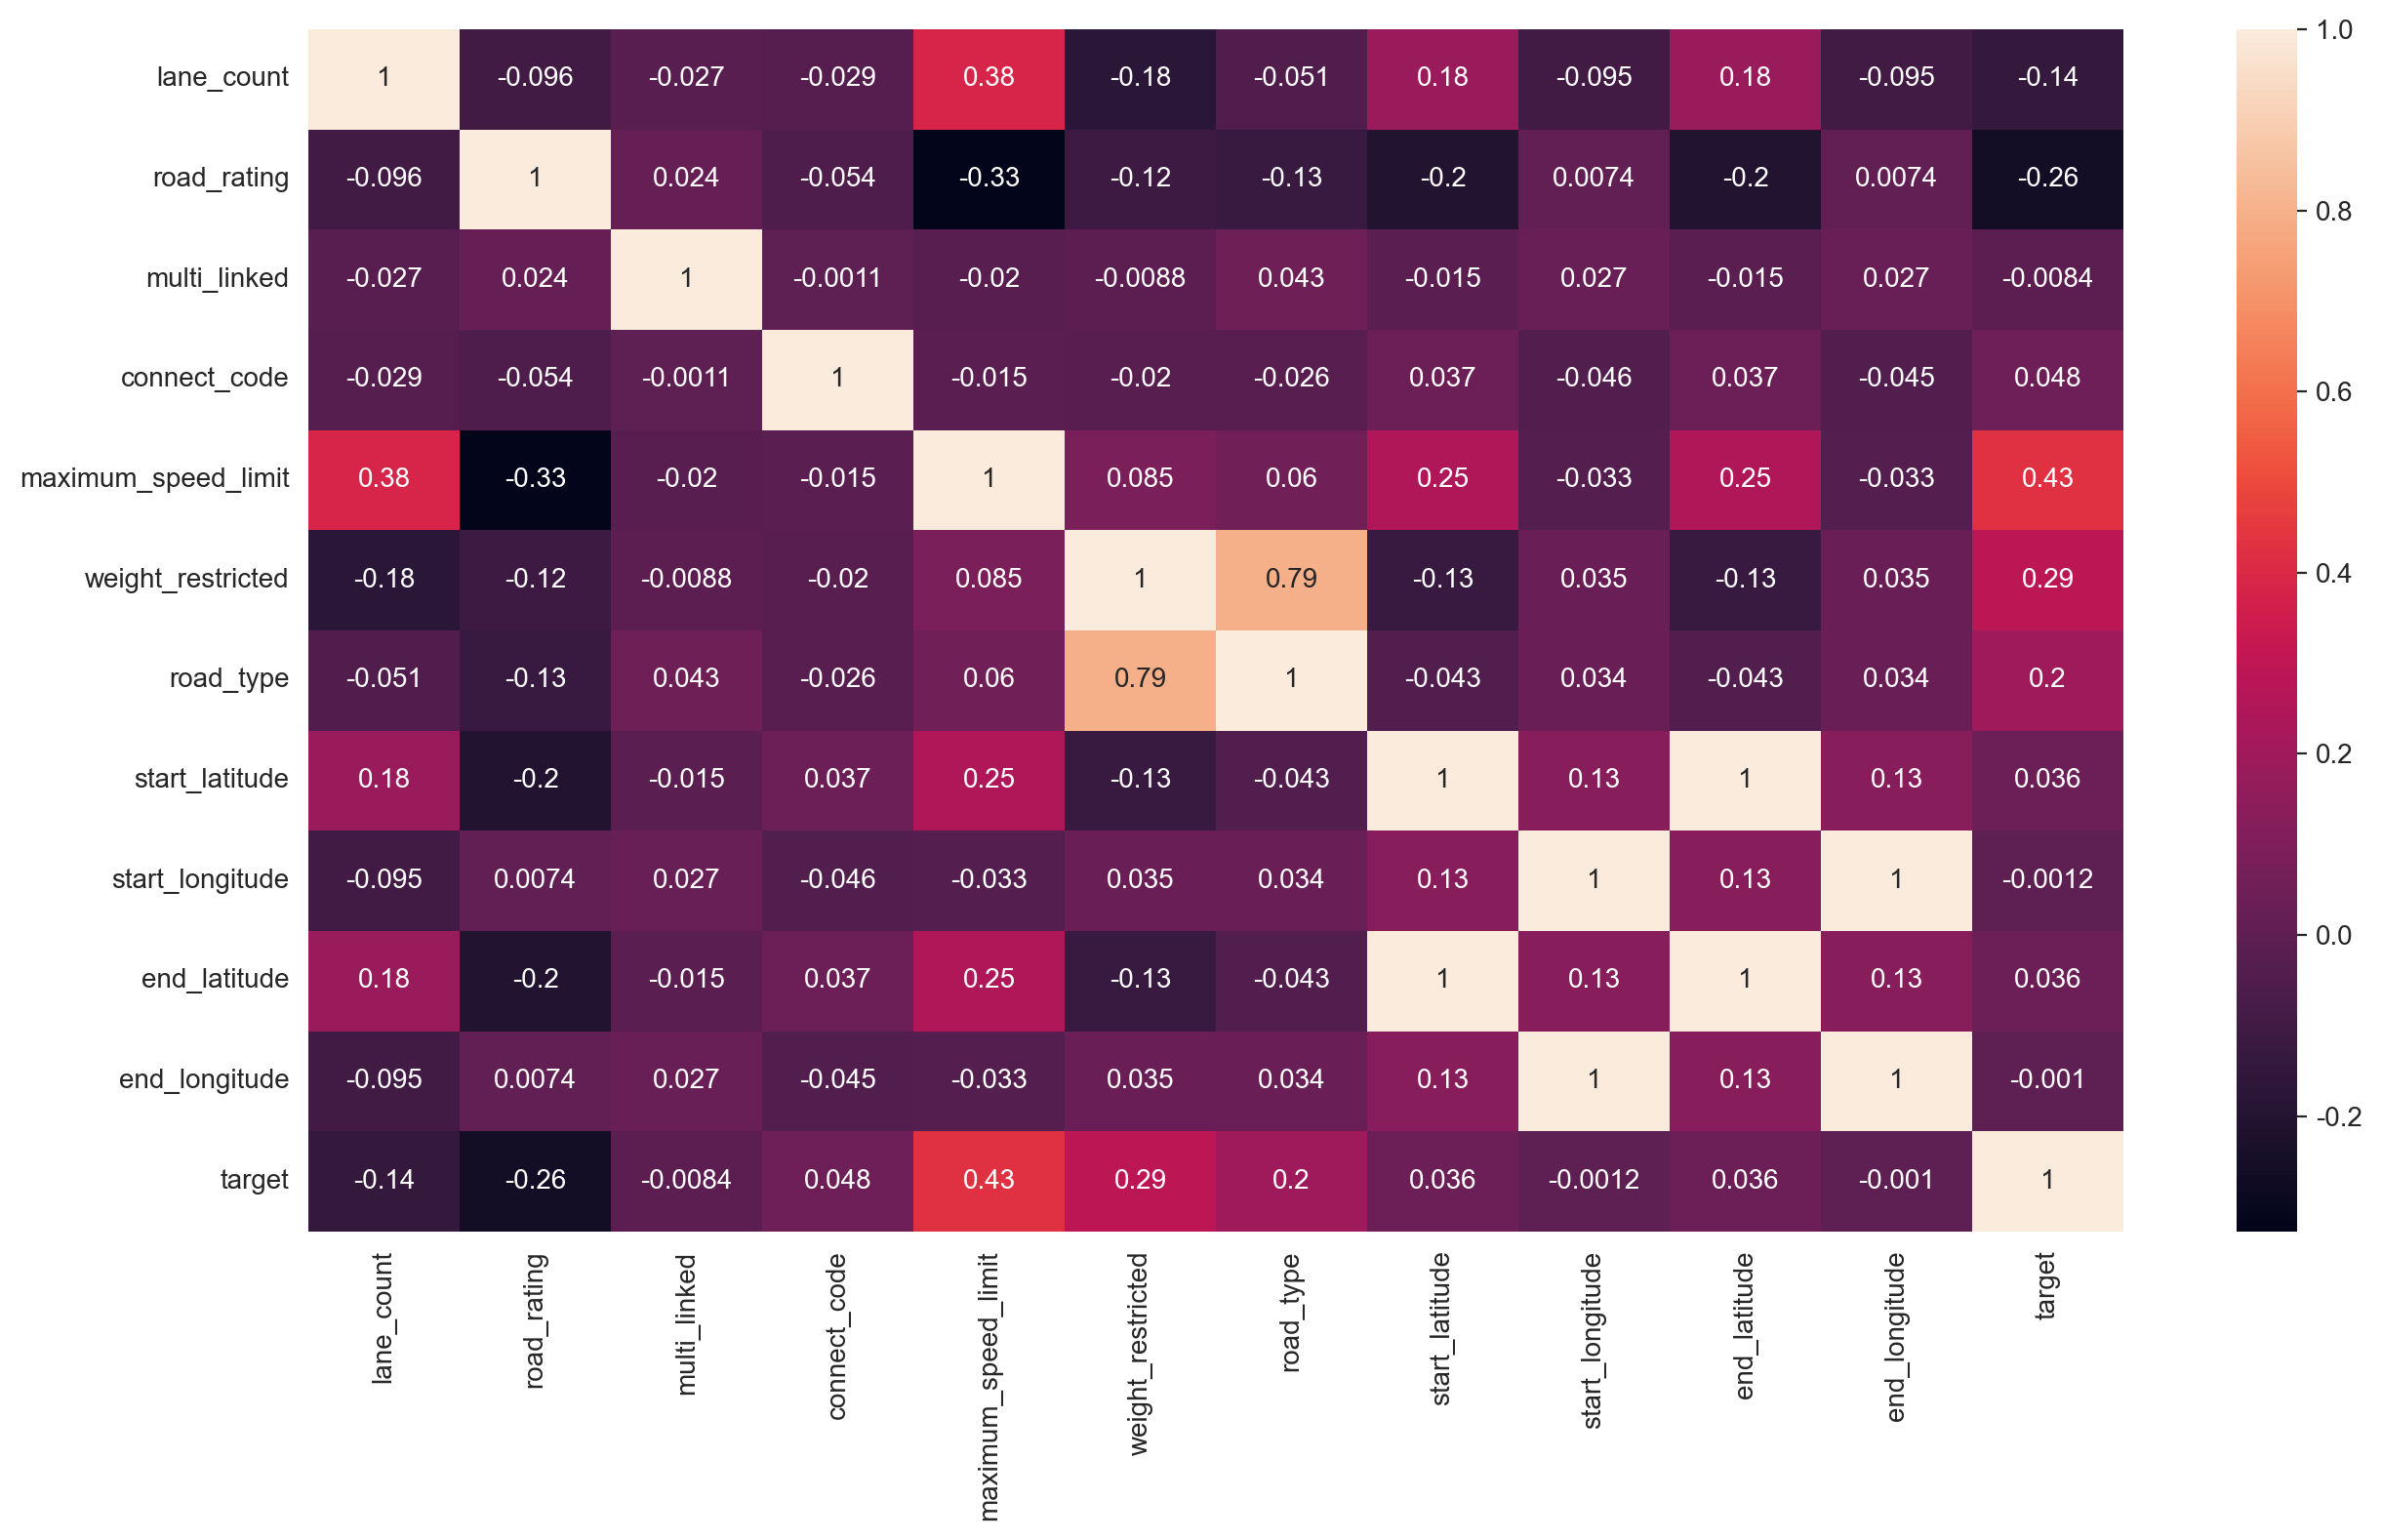

In [14]:
## 'base_date', 'base_hour' 컬럼 제외하고 히트맵 그리기
plt.figure(figsize=(15, 8))
sns.heatmap(x_train.drop(['base_date', 'base_hour'], axis=1).corr(), annot=True)

In [15]:
print(x_train['maximum_speed_limit'].value_counts())
print(x_train.groupby('maximum_speed_limit')['target'].mean())

60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: maximum_speed_limit, dtype: int64
maximum_speed_limit
30.0    32.220825
40.0    62.774078
50.0    35.492229
60.0    42.316288
70.0    41.366207
80.0    60.703697
Name: target, dtype: float32


<Axes: xlabel='maximum_speed_limit', ylabel='Density'>

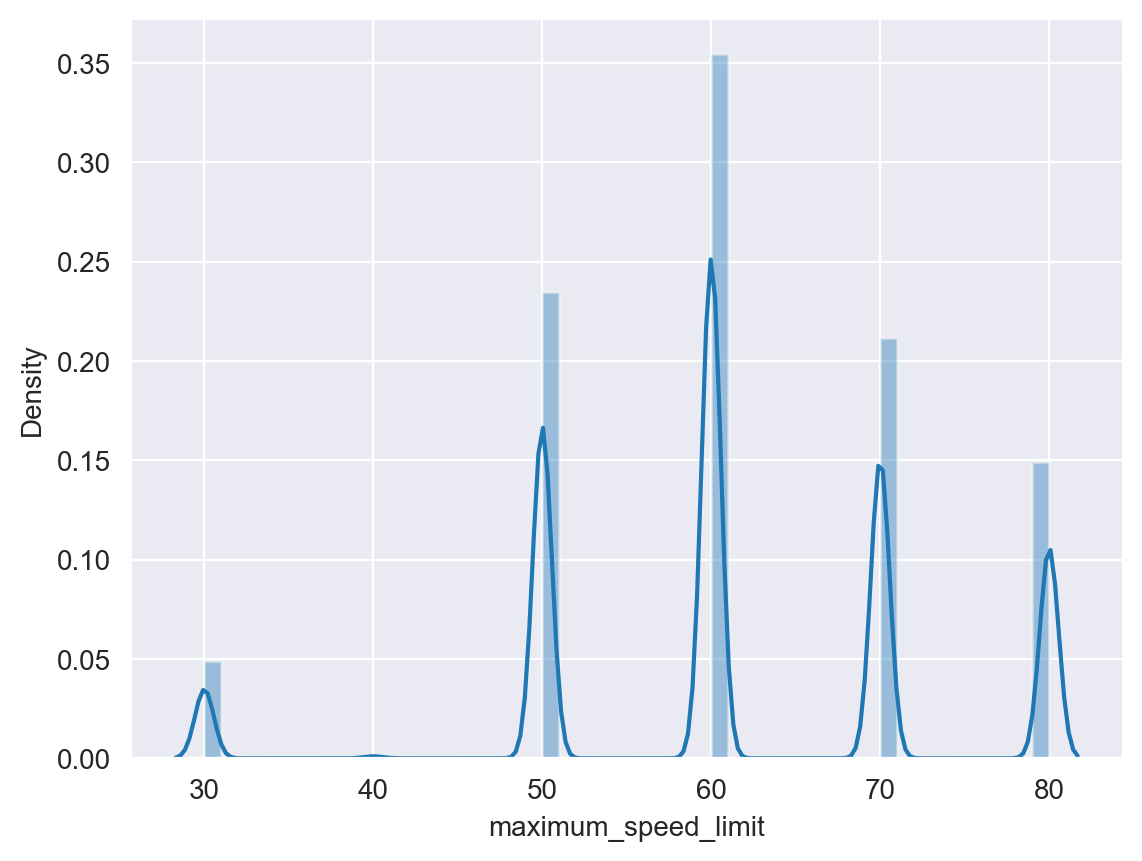

In [16]:
## 범주별 분포
sns.distplot(x_train['maximum_speed_limit'])

<Axes: xlabel='maximum_speed_limit', ylabel='target'>

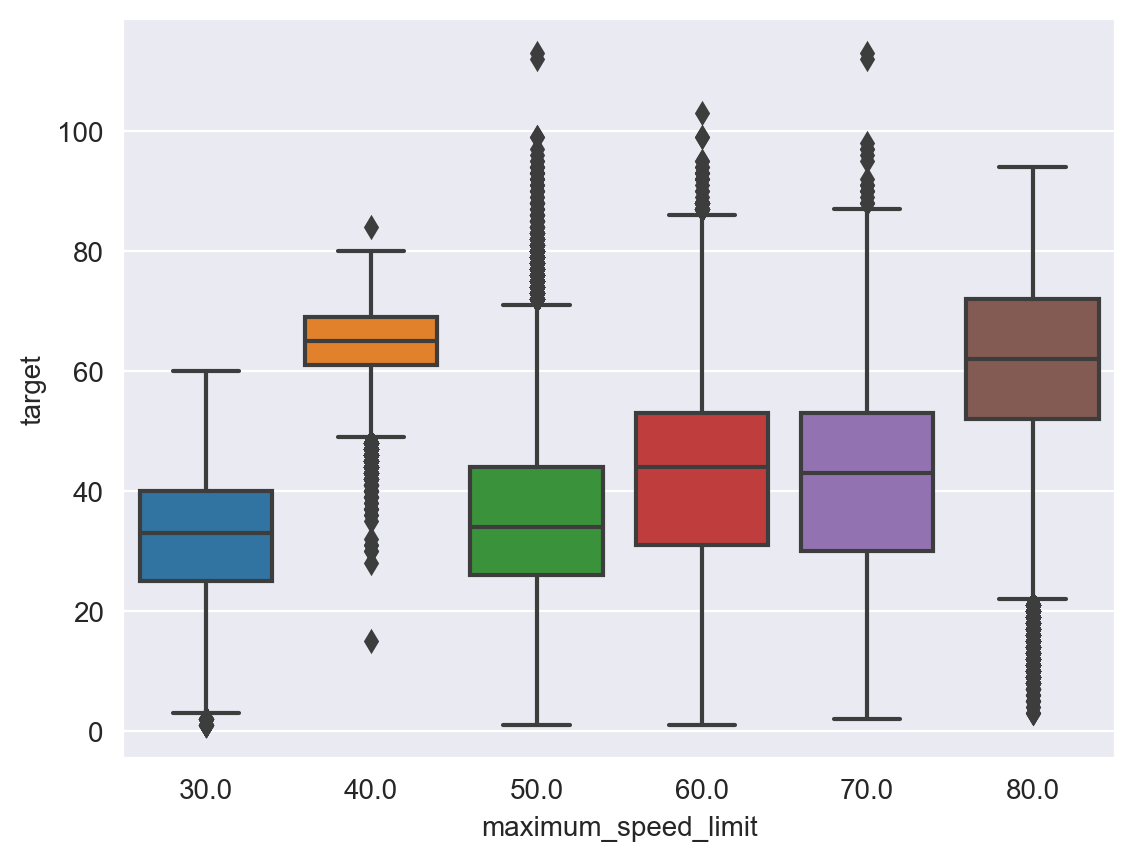

In [17]:
## 상자그림
sns.boxplot(x='maximum_speed_limit', y='target', data=x_train)

In [18]:
print(x_train['weight_restricted'].value_counts())
print(x_train.groupby('weight_restricted')['target'].mean())

0.0        4032874
43200.0     410361
32400.0     239305
50000.0      18677
Name: weight_restricted, dtype: int64
weight_restricted
0.0        40.955696
32400.0    47.453350
43200.0    57.883888
50000.0    47.088665
Name: target, dtype: float32


<Axes: xlabel='weight_restricted', ylabel='target'>

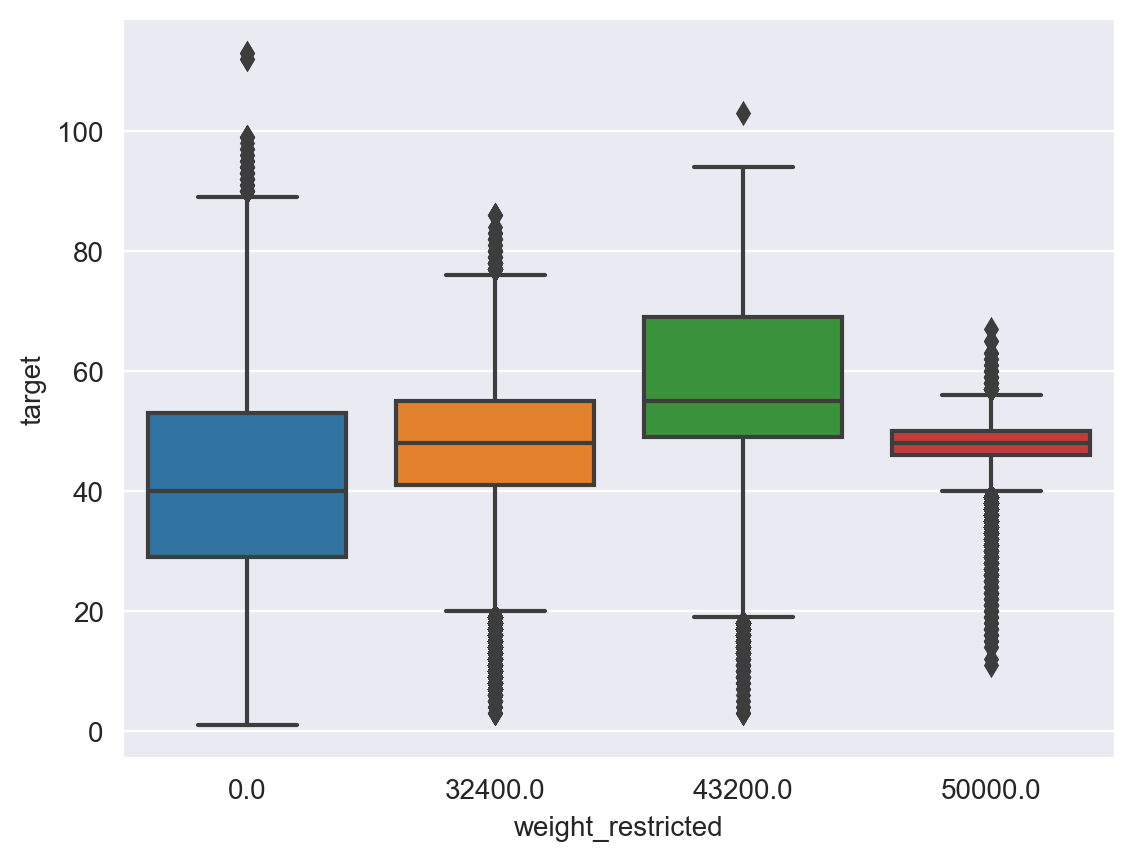

In [19]:
sns.boxplot(x='weight_restricted', y='target', data=x_train)

In [20]:
print(x_train['lane_count'].value_counts())
print(x_train.groupby('lane_count')['target'].mean())

2    2352092
1    1558531
3     790594
Name: lane_count, dtype: int64
lane_count
1    43.570560
2    44.915714
3    34.917782
Name: target, dtype: float32


<Axes: xlabel='target', ylabel='Count'>

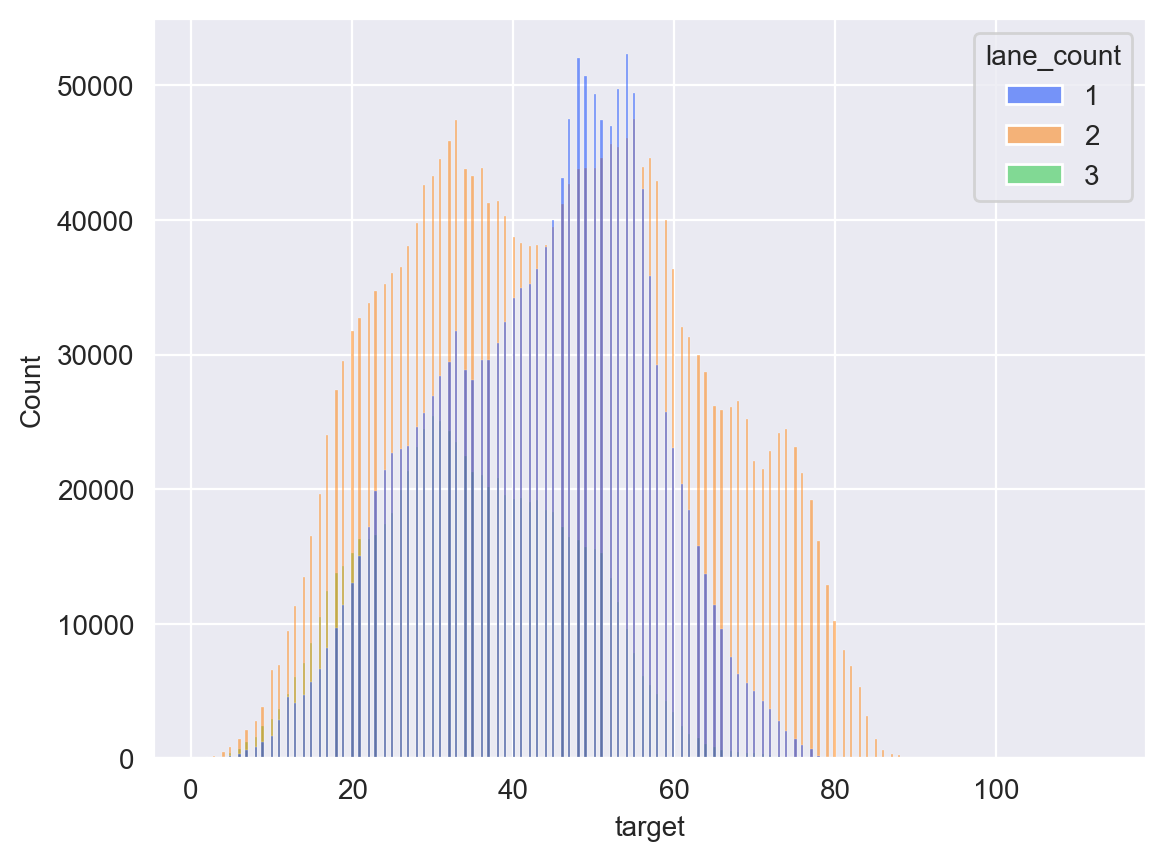

In [21]:
sns.histplot(x=x_train['target'], hue=x_train['lane_count'], palette='bright')

<Axes: xlabel='lane_count', ylabel='target'>

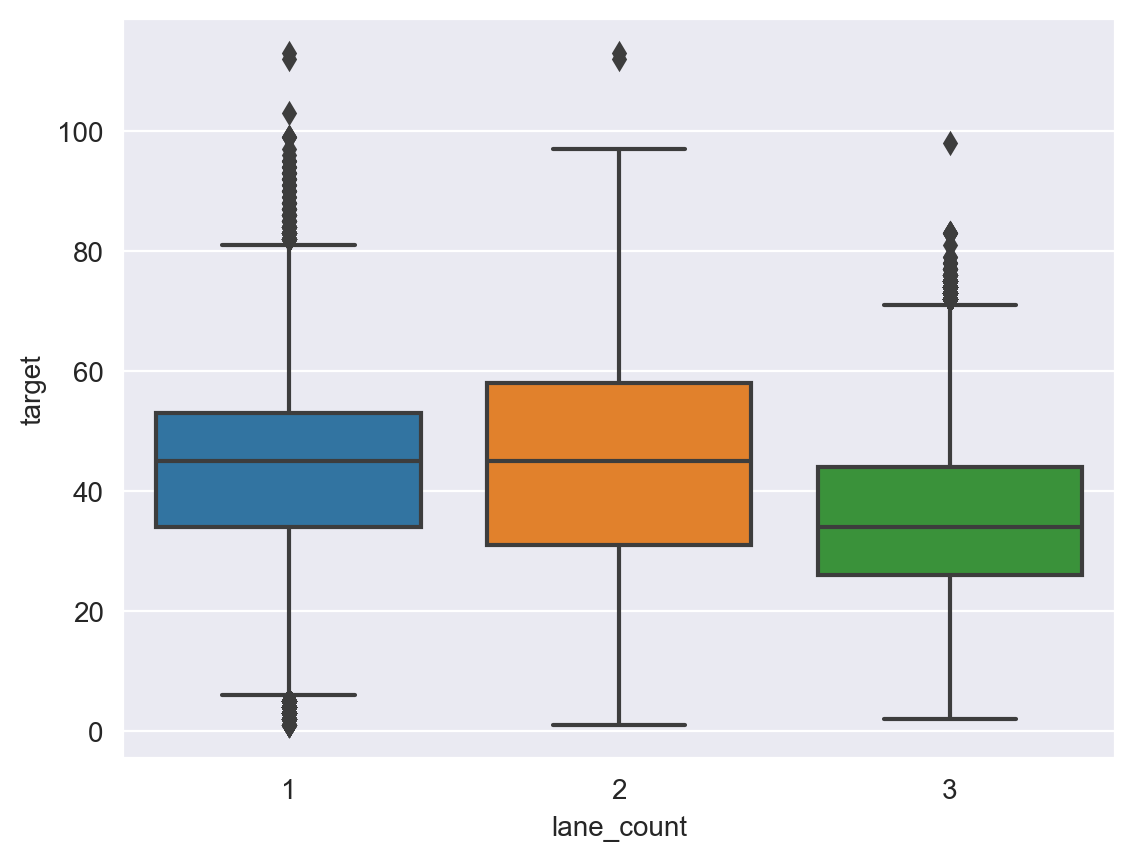

In [22]:
sns.boxplot(x='lane_count', y='target', data=x_train)

In [23]:
print(x_train['road_rating'].value_counts())
print(x_train.groupby('road_rating')['target'].mean())

103    2159511
107    1582214
106     959492
Name: road_rating, dtype: int64
road_rating
103    46.388470
106    48.021549
107    34.701408
Name: target, dtype: float32


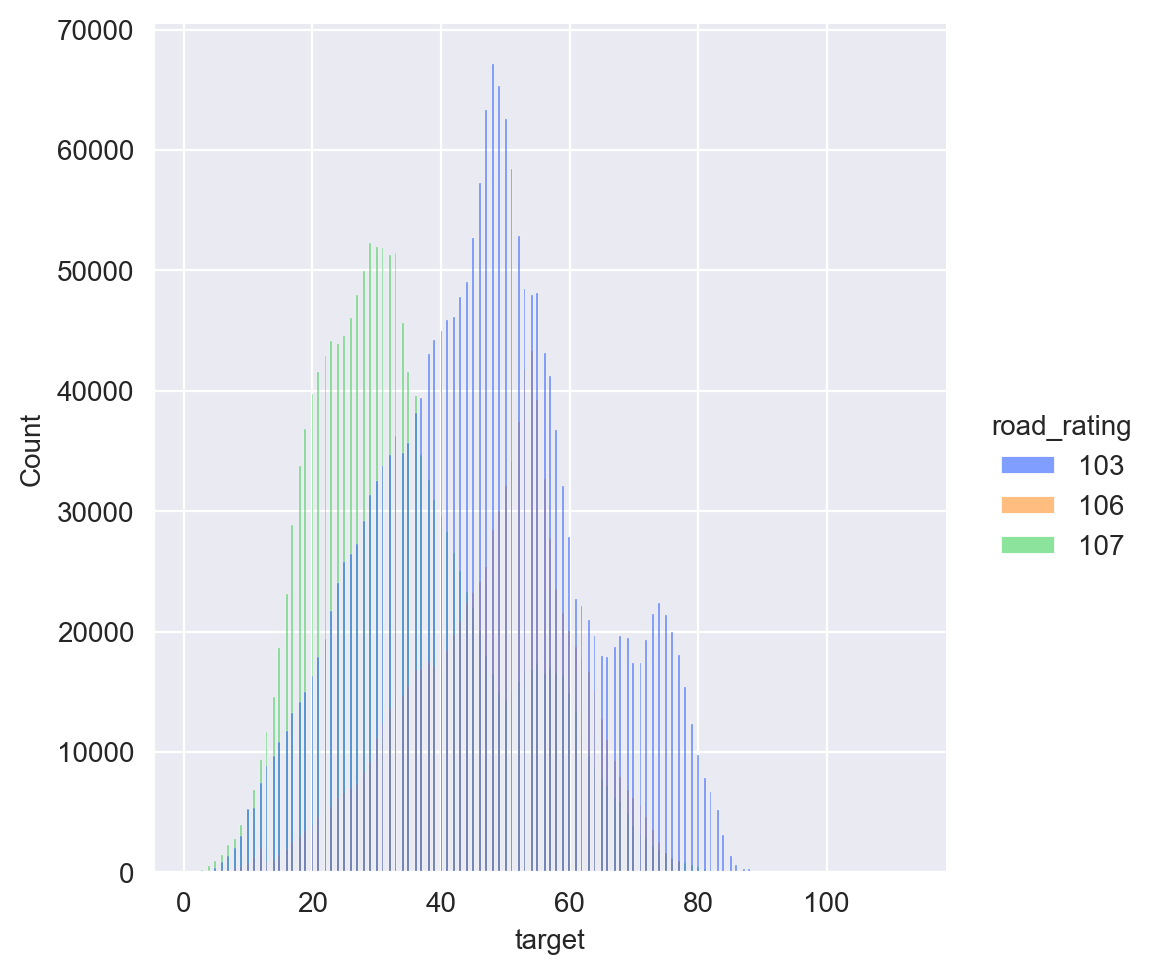

In [24]:
sns.displot(x = x_train['target'], hue = x_train['road_rating'], palette='bright')


In [25]:
print(x_train['road_type'].value_counts())
print(x_train.groupby('road_type')['target'].mean())

0    3737117
3     964100
Name: road_type, dtype: int64
road_type
0    41.160931
3    49.097122
Name: target, dtype: float32


road_type
0    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
Name: target, dtype: object

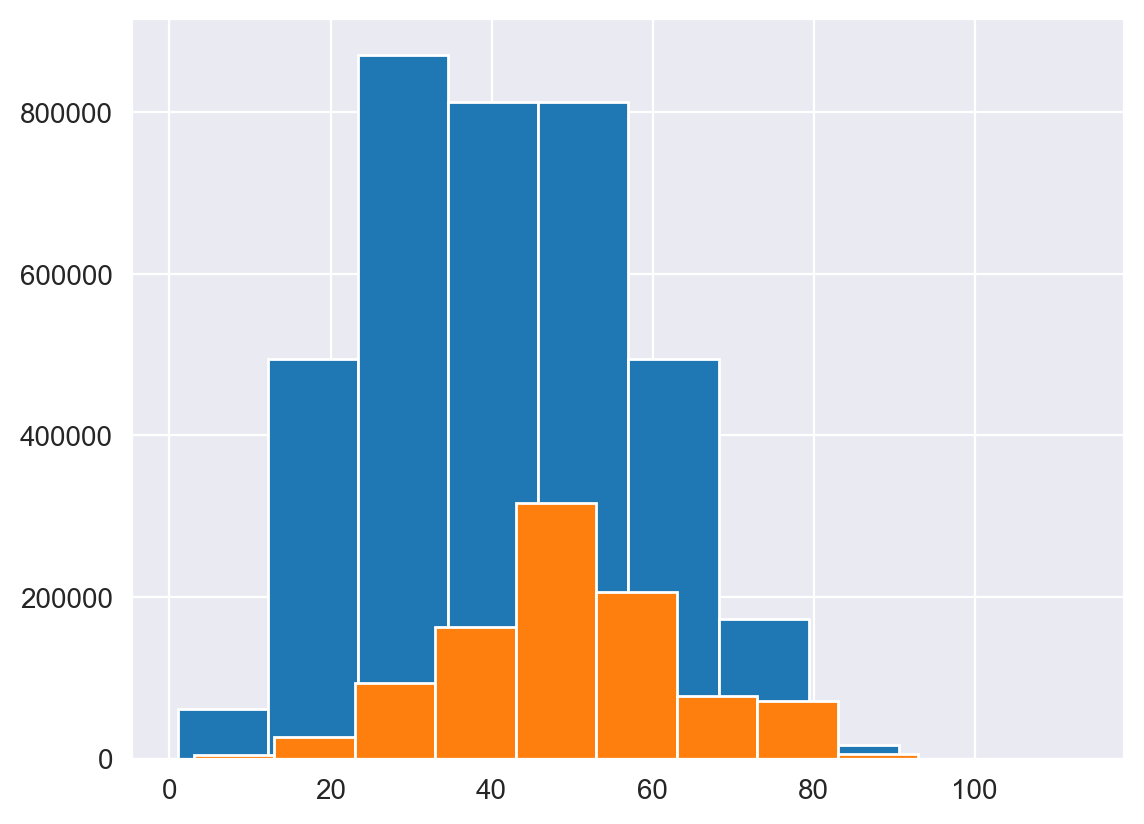

In [26]:
## 시각화
x_train.groupby('road_type')['target'].hist()

In [27]:
## 도로명 컬럼이 결측치('-')인 행만 따로 추출
road_missing_value = x_train[x_train['road_name'] == '-']
road_missing_value

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
6,TRAIN_0000006,20220106,목,0,2,107,-,0,0,60.0,...,0,가동,33.418412,126.268029,없음,나동,33.414175,126.269378,없음,39.0
14,TRAIN_0000014,20220203,목,16,1,107,-,0,0,60.0,...,3,송목교,33.316913,126.624634,없음,송목교,33.317065,126.623867,없음,58.0
28,TRAIN_0000028,20220612,일,14,2,107,-,0,0,50.0,...,0,광평교차로,33.330822,126.354179,없음,금악,33.330673,126.354987,없음,59.0
30,TRAIN_0000030,20220623,목,6,2,107,-,0,0,80.0,...,0,일호유리,33.472276,126.418443,없음,상귀교차로,33.473390,126.409129,없음,75.0
31,TRAIN_0000031,20211028,목,15,1,107,-,0,0,60.0,...,3,남수교,33.337244,126.695809,없음,남수교,33.337398,126.696117,없음,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701204,TRAIN_4701204,20211001,금,19,1,107,-,0,0,60.0,...,0,한남교차로,33.325096,126.665698,없음,서중2교,33.331742,126.676431,없음,55.0
4701205,TRAIN_4701205,20220112,수,19,1,107,-,0,0,50.0,...,0,감귤창고,33.450215,126.920771,없음,수협,33.448689,126.916358,없음,23.0
4701208,TRAIN_4701208,20220323,수,19,2,107,-,0,0,80.0,...,3,제2태흥교,33.287356,126.736525,없음,제2태흥교,33.287582,126.737512,없음,61.0
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0


In [28]:
print(road_missing_value['road_rating'].value_counts())
print(road_missing_value['weight_restricted'].value_counts())

107    569463
Name: road_rating, dtype: int64
0.0        481943
43200.0     68013
32400.0     19507
Name: weight_restricted, dtype: int64


In [29]:
print(x_train[(x_train['road_rating'] == 107) & (x_train['weight_restricted'] == 43200.0)]['road_name'].value_counts())
print(x_train[(x_train['road_rating'] == 107) & (x_train['weight_restricted'] == 32400.0)]['road_name'].value_counts())

-      68013
중문로    11336
Name: road_name, dtype: int64
-      19507
산서로     7940
Name: road_name, dtype: int64


In [30]:
## 결측치 대체
print('결측치 대체 전: ', len(x_train[x_train['road_name'] == '-']))

x_train.loc[(x_train['road_rating'] == 107) & (x_train['weight_restricted'] == 32400.0) & (x_train['road_name'] == "-"), 'road_name'] = "산서로"
x_train.loc[(x_train['road_rating'] == 107) & (x_train['weight_restricted'] == 43200.0) & (x_train['road_name'] == "-"), 'road_name'] = "중문로"

x_test.loc[(x_test['road_rating'] == 107) & (x_test['weight_restricted'] == 32400.0) & (x_test['road_name'] == "-"), 'road_name'] = "산서로"
x_test.loc[(x_test['road_rating'] == 107) & (x_test['weight_restricted'] == 43200.0) & (x_test['road_name'] == "-"), 'road_name'] = "중문로"

print('결측치 대체 후: ', len(x_train[x_train['road_name'] == '-']))

결측치 대체 전:  569463
결측치 대체 후:  481943


In [31]:
## 'start_node_name', 'road_name' 컬럼의 조합
for i in x_train['start_node_name'].unique():
    if (len(x_train[(x_train['start_node_name'] == i)]['road_name'].value_counts()) != 2):
        continue
    if "-" in x_train[(x_train['start_node_name'] == i)]['road_name'].value_counts().index:
        print("-----------", i, "--------------")
        print(x_train[(x_train['start_node_name'] == i)]['road_name'].value_counts())


node_name_start = ['송목교', '남수교', '하귀입구', '양계장', '난산입구', '영주교', '서중2교', 
                   '천제이교', '하나로교', '신하교', '야영장', '월계교', '서울이용원', '김녕교차로', 
                   '어도초등교', '광삼교', '오렌지농원', '우사', '서귀포시산림조합', '성읍삼거리']

road_name = ['중문로', '중문로', '일반국도12호선', '일반국도12호선', '지방도1119호선', '일반국도11호선', '중문로', 
             '산서로', '중문로', '중문로', '관광단지1로', '산서로', '태평로', '일반국도12호선', 
             '일반국도16호선', '중문로', '일반국도11호선', '일반국도16호선', '지방도1136호선', '일반국도16호선']

print('결측치 대체 전: ', len(x_train[x_train['road_name'] == '-']))

for i in range(len(node_name_start)):
    x_train.loc[(x_train['start_node_name'] == node_name_start[i]) & (x_train['road_name'] == '-'), 'road_name'] = road_name[i]
    x_test.loc[(x_test['start_node_name'] == node_name_start[i]) & (x_test['road_name'] == '-'), 'road_name'] = road_name[i]

print('결측치 대체 후: ', len(x_train[x_train['road_name'] == '-']))

----------- 송목교 --------------
중문로    10390
-       5183
Name: road_name, dtype: int64
----------- 남수교 --------------
중문로    10360
-       5156
Name: road_name, dtype: int64
----------- 하귀입구 --------------
일반국도12호선    10656
-            5190
Name: road_name, dtype: int64
----------- 양계장 --------------
-           5330
일반국도12호선    5329
Name: road_name, dtype: int64
----------- 난산입구 --------------
지방도1119호선    4923
-            3113
Name: road_name, dtype: int64
----------- 영주교 --------------
일반국도11호선    23909
-             472
Name: road_name, dtype: int64
----------- 서중2교 --------------
중문로    10380
-       5204
Name: road_name, dtype: int64
----------- 천제이교 --------------
-      10930
산서로    10706
Name: road_name, dtype: int64
----------- 하나로교 --------------
중문로    10578
-       5282
Name: road_name, dtype: int64
----------- 신하교 --------------
중문로    10390
-       5205
Name: road_name, dtype: int64
----------- 야영장 --------------
관광단지1로    5570
-         5415
Name: road_name, dtype: in

In [32]:
x_train.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
weight_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [33]:
## 'end_node_name', 'road_name' 컬럼의 조합
for i in x_train['end_node_name'].unique():
    if (len(x_train[(x_train['end_node_name'] == i)]['road_name'].value_counts()) != 2):
        continue
    if "-" in x_train[(x_train['end_node_name'] == i)]['road_name'].value_counts().index:
        print("-----------", i, "--------------")
        print(x_train[(x_train['end_node_name'] == i)]['road_name'].value_counts())

node_name_end = ['남수교', '농협주유소', '난산입구', '성읍삼거리', '김녕교차로', '한남교차로', '서울이용원', 
                 '하귀입구', '우사', '어도초등교', '월계교', '양계장', '하나로교', '광삼교', 
                 '수간교차로', '난산사거리', '서중2교', '서귀포시산림조합', '옹포사거리', '진은교차로']

road_name = ['중문로', '산서로', '지방도1119호선', '일반국도16호선', '일반국도12호선', '중문로', '태평로', 
             '일반국도12호선', '일반국도16호선', '일반국도16호선', '산서로', '일반국도12호선', '중문로', '중문로', 
             '일반국도12호선', '지방도1119호선', '중문로', '지방도1136호선', '산서로', '중문로']

print('결측치 대체 전: ', len(x_train[x_train['road_name'] == '-']))

for i in range(len(node_name_end)):
    x_train.loc[(x_train['end_node_name'] == node_name_end[i]) & (x_train['road_name'] == '-'), 'road_name'] = road_name[i]
    x_test.loc[(x_test['end_node_name'] == node_name_end[i]) & (x_test['road_name'] == '-'), 'road_name'] = road_name[i]

print('결측치 대체 후: ', len(x_train[x_train['road_name'] == '-']))

----------- 남수교 --------------
중문로    10360
-       5187
Name: road_name, dtype: int64
----------- 농협주유소 --------------
-      8053
산서로    5089
Name: road_name, dtype: int64
----------- 난산입구 --------------
지방도1119호선    4978
-            2946
Name: road_name, dtype: int64
----------- 성읍삼거리 --------------
일반국도16호선    5030
-           4670
Name: road_name, dtype: int64
----------- 김녕교차로 --------------
일반국도12호선    5281
-           3266
Name: road_name, dtype: int64
----------- 한남교차로 --------------
중문로    5204
-      5198
Name: road_name, dtype: int64
----------- 서울이용원 --------------
태평로    11653
-       1417
Name: road_name, dtype: int64
----------- 하귀입구 --------------
일반국도12호선    10661
-            5144
Name: road_name, dtype: int64
----------- 우사 --------------
일반국도16호선    7677
-           4784
Name: road_name, dtype: int64
----------- 어도초등교 --------------
-           7053
일반국도16호선    5135
Name: road_name, dtype: int64
----------- 월계교 --------------
-      9598
산서로    8801
Name: road_nam

In [34]:
## 위도/경도 컬럼의 경우, 6번째 자리까지 반올림함 (반올림해도 train 데이터에서 고유값의 개수는 변하지 않음)
print('반올림 전: ', x_train['start_latitude'].nunique(), x_train['start_longitude'].nunique(), x_train['end_latitude'].nunique(), x_train['end_longitude'].nunique())

x_train[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']] = x_train[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']].apply(lambda x: round(x, 6))
x_test[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']] = x_test[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']].apply(lambda x: round(x, 6))

print('반올림 후', x_train['start_latitude'].nunique(), x_train['start_longitude'].nunique(), x_train['end_latitude'].nunique(), x_train['end_longitude'].nunique())


## 'start_latitude', 'road_name' 컬럼의 조합
for i in x_train['start_latitude'].unique():
    if (len(x_train[(x_train['start_latitude'] == i)]['road_name'].value_counts()) != 2):
        continue
    if "-" in x_train[(x_train['start_latitude'] == i)]['road_name'].value_counts().index:
        print("-----------", i, "--------------")
        print(x_train[(x_train['start_latitude'] == i)]['road_name'].value_counts())


latitude_start = [33.409416, 33.402546, 33.471164, 33.411255, 33.405319, 
                  33.322018, 33.325096, 33.408431, 33.284189, 33.47339]

road_name = ['산서로', '지방도1119호선', '일반국도12호선', '산서로', '산서로', 
             '중문로', '중문로', '산서로', '중문로', '일반국도12호선']

print('결측치 대체 전: ', len(x_train[x_train['road_name'] == '-']))

for i in range(len(latitude_start)):
    x_train.loc[(x_train['start_latitude'] == latitude_start[i]) & (x_train['road_name'] == '-'), 'road_name'] = road_name[i]
    x_test.loc[(x_test['start_latitude'] == latitude_start[i]) & (x_test['road_name'] == '-'), 'road_name'] = road_name[i]

print('결측치 대체 후: ', len(x_train[x_train['road_name'] == '-']))

반올림 전:  586 586 586 586
반올림 후 586 586 586 586
----------- 33.409416 --------------
-      3321
산서로    3184
Name: road_name, dtype: int64
----------- 33.402546 --------------
-            2953
지방도1119호선    2946
Name: road_name, dtype: int64
----------- 33.471164 --------------
-           5334
일반국도12호선    5331
Name: road_name, dtype: int64
----------- 33.411255 --------------
-      7382
산서로    4338
Name: road_name, dtype: int64
----------- 33.405319 --------------
산서로    4821
-      4159
Name: road_name, dtype: int64
----------- 33.322018 --------------
중문로    5198
-      2396
Name: road_name, dtype: int64
----------- 33.325096 --------------
중문로    5187
-      5187
Name: road_name, dtype: int64
----------- 33.408431 --------------
-      8441
산서로    4777
Name: road_name, dtype: int64
----------- 33.284189 --------------
중문로    5306
-      5288
Name: road_name, dtype: int64
----------- 33.47339 --------------
-           5344
일반국도12호선    5329
Name: road_name, dtype: int64
결측치 대체 전:  27

In [35]:
## 'end_latitude', 'road_name' 컬럼의 조합
for i in x_train['end_latitude'].unique():
    if (len(x_train[(x_train['end_latitude'] == i)]['road_name'].value_counts()) != 2):
        continue
    if "-" in x_train[(x_train['end_latitude'] == i)]['road_name'].value_counts().index:
        print("-----------", i, "--------------")
        print(x_train[(x_train['end_latitude'] == i)]['road_name'].value_counts())
latitude_end = [33.47339, 33.411255, 33.412573, 33.244882, 33.322018]

road_name = ['일반국도12호선', '산서로', '산서로', '산서로', '중문로']

print('결측치 대체 전: ', len(x_train[x_train['road_name'] == '-']))

for i in range(len(latitude_end)):
    x_train.loc[(x_train['end_latitude'] == latitude_end[i]) & (x_train['road_name'] == '-'), 'road_name'] = road_name[i]
    x_test.loc[(x_test['end_latitude'] == latitude_end[i]) & (x_test['road_name'] == '-'), 'road_name'] = road_name[i]

print('결측치 대체 후: ', len(x_train[x_train['road_name'] == '-']))

----------- 33.47339 --------------
-           5338
일반국도12호선    5334
Name: road_name, dtype: int64
----------- 33.411255 --------------
산서로    7480
-      4395
Name: road_name, dtype: int64
----------- 33.412573 --------------
-      4389
산서로    4199
Name: road_name, dtype: int64
----------- 33.244882 --------------
-      5528
산서로    5415
Name: road_name, dtype: int64
----------- 33.322018 --------------
중문로    5187
-      2493
Name: road_name, dtype: int64
결측치 대체 전:  228095
결측치 대체 후:  205952


In [36]:
## 'start_longitude', 'road_name' 컬럼의 조합
for i in x_train['start_longitude'].unique():
    if (len(x_train[(x_train['start_longitude'] == i)]['road_name'].value_counts()) != 2) :
        continue
    if "-" in x_train[(x_train['start_longitude'] == i)]['road_name'].value_counts().index:
        print("-----------", i, "--------------")
        print(x_train[(x_train['start_longitude'] == i)]['road_name'].value_counts())
longitude_start = [126.258674, 126.259693]

road_name = ['산서로', '산서로']

print('결측치 대체 전: ', len(x_train[x_train['road_name'] == '-']))

for i in range(len(longitude_start)):
    x_train.loc[(x_train['start_longitude'] == longitude_start[i]) & (x_train['road_name'] == '-'), 'road_name'] = road_name[i]
    x_test.loc[(x_test['start_longitude'] == longitude_start[i]) & (x_test['road_name'] == '-'), 'road_name'] = road_name[i]

print('결측치 대체 후: ', len(x_train[x_train['road_name'] == '-']))

----------- 126.258674 --------------
산서로    4395
-      4190
Name: road_name, dtype: int64
----------- 126.259693 --------------
산서로    4389
-      4223
Name: road_name, dtype: int64
결측치 대체 전:  205952
결측치 대체 후:  197539


In [37]:
## 'end_longitude', 'road_name' 컬럼의 조합
for i in x_train['end_longitude'].unique():
    if (len(x_train[(x_train['end_longitude'] == i)]['road_name'].value_counts()) != 2) :
        continue
    if "-" in x_train[(x_train['end_longitude'] == i)]['road_name'].value_counts().index:
        print("-----------", i, "--------------")
        print(x_train[(x_train['end_longitude'] == i)]['road_name'].value_counts())
longitude_end = [126.261797 , 126.259693]

road_name = ['산서로', '산서로']

print('결측치 대체 전: ', len(x_train[x_train['road_name'] == '-']))

for i in range(len(longitude_end)):
    x_train.loc[(x_train['end_longitude'] == longitude_end[i]) & (x_train['road_name'] == '-'), 'road_name'] = road_name[i]
    x_test.loc[(x_test['end_longitude'] == longitude_end[i]) & (x_test['road_name'] == '-'), 'road_name'] = road_name[i]

print('결측치 대체 후: ', len(x_train[x_train['road_name'] == '-']))

----------- 126.261797 --------------
-      4438
산서로    4223
Name: road_name, dtype: int64
----------- 126.259693 --------------
-      4454
산서로    4190
Name: road_name, dtype: int64
결측치 대체 전:  197539
결측치 대체 후:  188647


In [38]:
## 컬럼 타입 변경
x_train['base_date'] = pd.to_datetime(x_train['base_date'].astype('str'))
x_test['base_date'] = pd.to_datetime(x_test['base_date'].astype('str'))
## 연도(year), 월(month) 컬럼 생성
x_train['year'] = x_train['base_date'].dt.year
x_train['month'] = x_train['base_date'].dt.month
x_train['day'] = x_train['base_date'].dt.day
x_train['weekday'] = x_train['base_date'].dt.dayofweek

x_test['year'] = x_test['base_date'].dt.year
x_test['month'] = x_test['base_date'].dt.month
x_test['day'] = x_test['base_date'].dt.day
x_test['weekday'] = x_test['base_date'].dt.dayofweek
## 8월과 인접한 달인 7, 9월인지 아닌지에 따라 구분하는 컬럼 생성
x_train['adjacent_august'] = 'N'
x_test['adjacent_august'] = 'N'

x_train.loc[(x_train['month'] >= 7) & (x_train['month'] <= 9), 'adjacent_august'] = 'Y'
x_test.loc[(x_test['month'] >= 7) & (x_test['month'] <= 9), 'adjacent_august'] = 'Y'

print(x_train['adjacent_august'].value_counts())

N    3855613
Y     845604
Name: adjacent_august, dtype: int64


In [39]:
## '시간대': 8~20시(worktime), 21~7시(resttime)
x_train['시간대'] = '0'
x_test['시간대'] = '0'

x_train.loc[(x_train['base_hour'] >= 8) & (x_train['base_hour'] <= 20), '시간대'] = 'worktime'
x_train.loc[(x_train['base_hour'] <= 7) | (x_train['base_hour'] >= 21), '시간대'] = 'resttime'

x_test.loc[(x_train['base_hour'] >= 8) & (x_test['base_hour'] <= 20), '시간대'] = 'worktime'
x_test.loc[(x_train['base_hour'] <= 7) | (x_test['base_hour'] >= 21), '시간대'] = 'resttime'

print(x_train['시간대'].value_counts())

worktime    2716112
resttime    1985105
Name: 시간대, dtype: int64


In [40]:
## '계절': 봄(3~5월), 여름(6~8월), 가을(9~11월), 겨울(12~2월)
x_train['season'] = '0'
x_test['season'] = '0'

x_train.loc[(x_train['month'] >= 3) & (x_train['month'] <= 5), 'season'] = '봄'
x_train.loc[(x_train['month'] >= 6) & (x_train['month'] <= 8), 'season'] = '여름'
x_train.loc[(x_train['month'] >= 9) & (x_train['month'] <= 11), 'season'] = '가을'
x_train.loc[(x_train['month'] <= 2) | (x_train['month'] == 12), 'season'] = '겨울'

x_test.loc[(x_test['month'] >= 3) & (x_test['month'] <= 5), 'season'] = '봄'
x_test.loc[(x_test['month'] >= 6) & (x_test['month'] <= 8), 'season'] = '여름'
x_test.loc[(x_test['month'] >= 9) & (x_test['month'] <= 11), 'season'] = '가을'
x_test.loc[(x_test['month'] <= 2) | (x_test['month'] == 12), 'season'] = '겨울'

print(x_train['season'].value_counts())

겨울    1737202
가을    1229803
봄      969380
여름     764832
Name: season, dtype: int64


In [41]:
## 평일/주말 여부: 'weekday' 컬럼값이 0~4이면 평일, 5~6이면 주말
x_train['주말여부'] = 'Y'
x_test['주말여부'] = 'Y'

x_train.loc[x_train['weekday'] <= 4, '주말여부'] = 'N'

x_test.loc[x_test['weekday'] <= 4, '주말여부'] = 'N'

print(x_train['주말여부'].value_counts())

N    3357818
Y    1343399
Name: 주말여부, dtype: int64


In [42]:
## 범주별로 평균속도(target)에 차이가 있는지 확인
category_variable = x_train[['day_of_week', 'start_turn_restricted', 'end_turn_restricted', 
                             'year', 'month', 'day', 'weekday', 'adjacent_august', '시간대', 
                             'season', '주말여부', 'target']]
## 범주별 target 값의 평균에 차이가 있는지 확인
for i in range(len(category_variable.columns)-1):
    print(category_variable.groupby(category_variable.columns[i])['target'].mean())
    print('\n')

day_of_week
금    42.450329
목    42.768345
수    42.770370
월    42.761364
일    43.179298
토    42.894115
화    42.699196
Name: target, dtype: float32


start_turn_restricted
없음    43.610245
있음    35.238968
Name: target, dtype: float32


end_turn_restricted
없음    43.645592
있음    34.916206
Name: target, dtype: float32


year
2021    43.416866
2022    42.382030
Name: target, dtype: float32


month
1     43.033131
2     43.256184
3     43.548672
5     42.639328
6     42.614159
7     36.282303
9     43.694340
10    43.495716
11    43.728214
12    43.030018
Name: target, dtype: float32


day
1     43.030327
2     43.124435
3     42.979557
4     42.948139
5     42.843987
6     43.301701
7     42.846741
8     42.880642
9     42.935852
10    42.917366
11    42.713867
12    43.055782
13    42.852905
14    42.994549
15    43.117218
16    43.281006
17    42.406204
18    42.546124
19    42.755985
20    42.468784
21    42.408405
22    42.606018
23    42.789249
24    42.423531
25    42.651882
26    42.11

In [43]:
## 범주별 평균속도에 큰 차이가 없는 컬럼 모두 삭제
x_train = x_train.drop(['day_of_week', 'weekday', 'year', 'month', 'day', '주말여부'], axis=1)
x_test = x_test.drop(['day_of_week', 'weekday', 'year', 'month', 'day', '주말여부'], axis=1)
## 분석에 필요하지 않은 컬럼 모두 삭제
x_train = x_train.drop(['base_date', 'base_hour'], axis=1)
x_test = x_test.drop(['base_date', 'base_hour'], axis=1)
len(x_train.columns)

21

In [44]:
print('이상치 처리 전: ', len(x_train))

x_train = x_train[x_train['target'] < 100]

print('이상치 처리 후: ', len(x_train))

이상치 처리 전:  4701217
이상치 처리 후:  4701212


In [45]:
## 범주형 변수 라벨인코딩
# 범주형 변수만 따로 추출
category_variables = ['start_node_name', 'end_node_name', 'road_rating', 'road_name', 'maximum_speed_limit', 'weight_restricted', 
                      'road_type', 'start_turn_restricted', 'end_turn_restricted', 'adjacent_august', '시간대', 'season']

# 라벨인코딩
from sklearn.preprocessing import LabelEncoder

for i in category_variables:
    le = LabelEncoder()
    le = le.fit(x_train[i])
    x_train[i] = le.transform(x_train[i])
    
    for label in np.unique(x_test[i]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    x_test[i] = le.transform(x_test[i])

In [46]:
## 'index' 컬럼 따로 저장해두기
x_test_index = x_test['id']

x_train = x_train.drop('id', axis=1)
x_test = x_test.drop('id', axis=1)
## target 변수 따로 저장
Y_train = x_train['target']
X_train = x_train.drop('target', axis=1)
X_test = x_test.copy()

In [47]:
from sklearn.model_selection import train_test_split
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X_train, Y_train, test_size=0.2, random_state=10)

print(X_TRAIN.shape)
print(X_TEST.shape)
print(Y_TRAIN.shape)
print(Y_TEST.shape)

(3760969, 19)
(940243, 19)
(3760969,)
(940243,)


In [48]:
## 모형 학습
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(num_iterations=500, learning_rate=0.17, 
                           max_depth=11, min_child_weight=1, 
                           colsample_bytree=1, random_state=10)
lgbm.fit(X_TRAIN, Y_TRAIN)

LGBMRegressor(colsample_bytree=1, learning_rate=0.17, max_depth=11,
              min_child_weight=1, num_iterations=500, random_state=10)

In [49]:
## 결과 예측
pred_lgbm = pd.DataFrame(lgbm.predict(X_test)).rename(columns={0:'target'})
print(pred_lgbm)

           target
0       28.069939
1       43.954358
2       62.055189
3       38.095074
4       40.367471
...           ...
291236  46.891252
291237  52.893778
291238  36.513782
291239  21.749670
291240  45.735175

[291241 rows x 1 columns]


In [50]:
## 모델 평가
from sklearn.metrics import mean_absolute_error
PRED_LGBM = pd.DataFrame(lgbm.predict(X_TEST)).rename(columns={0:'target'})
print(mean_absolute_error(Y_TEST, PRED_LGBM))

3.880130558552691
